# Problem 1

Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [3]:
data = pd.DataFrame(Max,columns=['Max'])
data['Min'] = Min
data.head()

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32


Text(0, 0.5, 'Temprature')

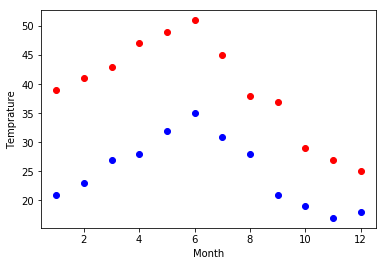

In [4]:
month = np.arange(1,13)
plt.plot(month,Max,'ro')
plt.plot(month,Min,'bo')
plt.xlabel('Month')
plt.ylabel('Temprature')

In [6]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi /times.max()))

In [12]:
np_max = np.array(data['Max'])
np_min = np.array(data['Min'])

In [13]:
res_max, cov_max = optimize.curve_fit(yearly_temps, month,np_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,np_min, [-40, 20, 0])
days = np.linspace(0,12,num=365)
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

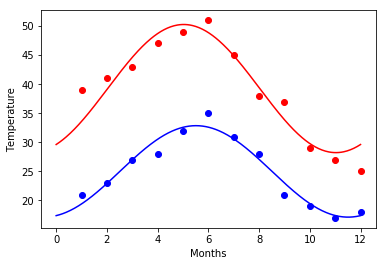

In [30]:
plt.plot(month, np_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, np_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')

plt.ylabel('Temperature')
plt.xlabel('Months')
plt.show()

# Problem 2

Titanic Dataset
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


In [16]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic_data.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


In [17]:
sex = []
sex.append(len(titanic_data[titanic_data['sex']=='male']))

In [18]:
sex.append(len(titanic_data[titanic_data['sex']=='female']))

In [19]:
name = ['Male','Female']
gender = pd.DataFrame(sex,index=name)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000216C70FEF28>],
      dtype=object)

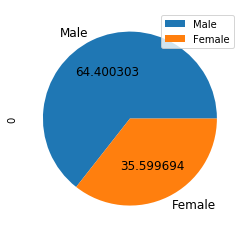

In [29]:
gender.plot.pie(subplots=True,fontsize=12,autopct='%f')

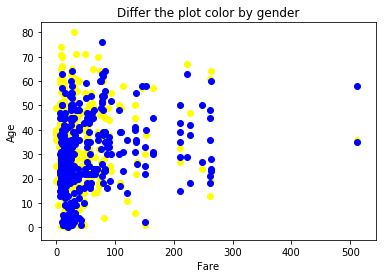

In [21]:
men = np.where(titanic_data['sex']=='male')
female = np.where(titanic_data['sex']=='female')
plt.scatter(x='fare',y='age',data=titanic_data.iloc[men],c='yellow')
plt.scatter(x='fare',y='age',data=titanic_data.iloc[female],c='blue')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Differ the plot color by gender')
plt.show()